# Promotion "Promo" and "Promo2" vs "Sales"

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')

# Table of content
### 1. Load and merge original data
### 2. Sales vs Promo and Promo2
### 3. Promo in Store Types
____



## 1. Load and merge original data

In [70]:
train = pd.read_csv("../../data/train.csv")
store = pd.read_csv("../../data/store.csv")

/Users/magdalenablum-oeste/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
merged_train_store = pd.merge(store, train, on='Store', how='left')

In [66]:
merged_train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-02,3.0,5530.0,668.0,NaN,0.0,0,1.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-03,4.0,4327.0,578.0,1.0,0.0,0,1.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-04,5.0,4486.0,619.0,1.0,0.0,0,1.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-05,6.0,4997.0,635.0,1.0,0.0,NaN,1.0


## 2. Sales vs Promo and Promo2

In [67]:
# Convert Date to datetime and create a new column 'Month'
merged_train_store.Date = pd.to_datetime(merged_train_store.Date)
merged_train_store['Month'] = merged_train_store.Date.dt.month

### 2.1 Difference in Sales between Stores with Promo and Promo2

We use `catplot()` function from seaborn library, with the option `kind='point'` to present the sales over months and weekdays. A point in chart shows the mean value of sales for a month/ weekday over all years inluded in the data set. 

#### a) Average Sales in months when Promo = 0 (left)  and Promo = 1 (right).

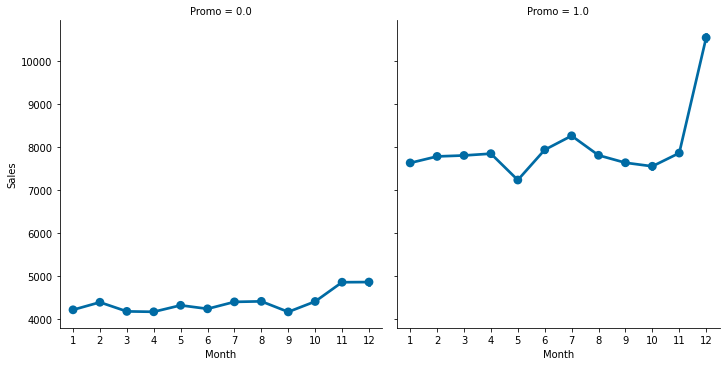

In [68]:
sns.catplot(x='Month', y='Sales',
               col='Promo',
               kind='point',
               data=merged_train_store);
#plt.title('Difference in Sales between Stores with Promo and Promo2')

#### b) Average Sales in months with additional granularity of Promo2. Generally Sales are higher when there is no Promo2 (no consecutive promotion).

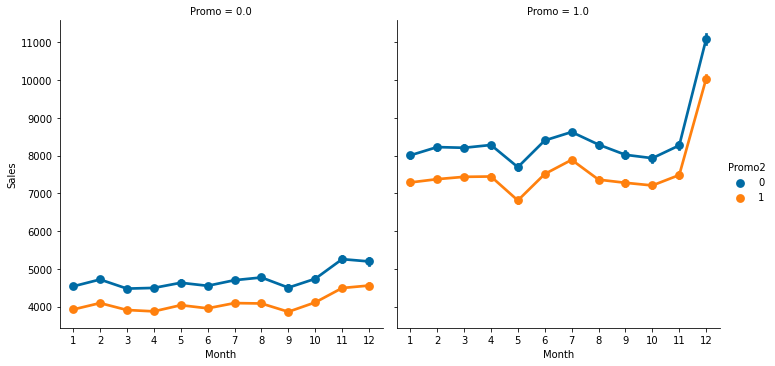

In [16]:
sns.catplot(x='Month', y='Sales',
               col='Promo',
               hue='Promo2',
               kind='point',
               data=merged_train_store)
;

#### c) Average Sales over the weekdays.

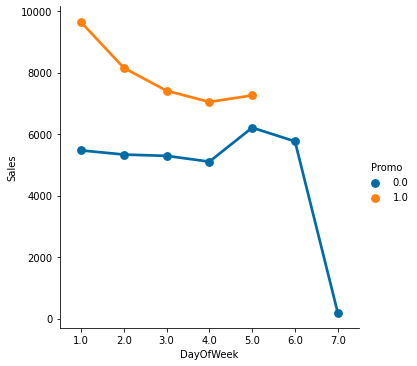

In [22]:
sns.catplot(x='DayOfWeek', y='Sales',
               hue='Promo',
               kind='point',
               data=merged_train_store);

In [78]:
### Check the calculation

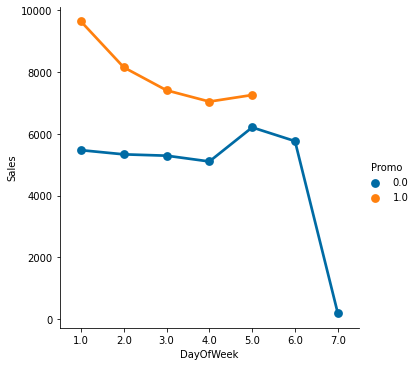

In [77]:
sales_weekdays = merged_train_store.groupby(['DayOfWeek', 'Promo']).mean().reset_index()
sales_weekdays
sns.catplot(x='DayOfWeek', y='Sales',
               hue='Promo',
               kind='point',
               data=sales_weekdays);

## 3. Promo in Store Types

#### a) Number of Promo in StoreType

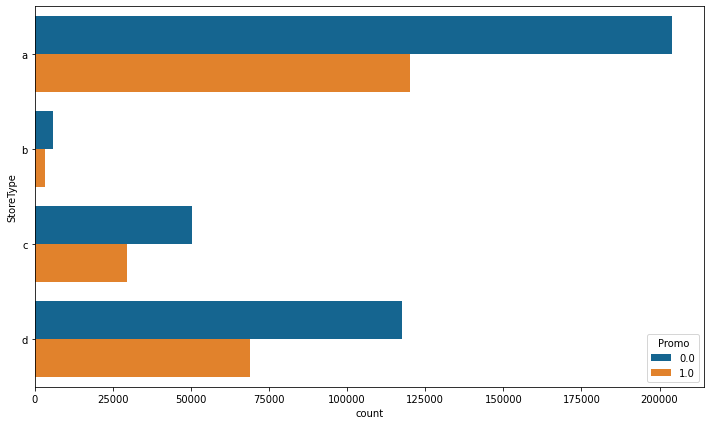

In [28]:
plt.figure(figsize=(12, 7))
sns.countplot(y='StoreType',
              hue='Promo',
              data=merged_train_store.sort_values(by = ['StoreType']));

#### b) Number of Promo in Assortment

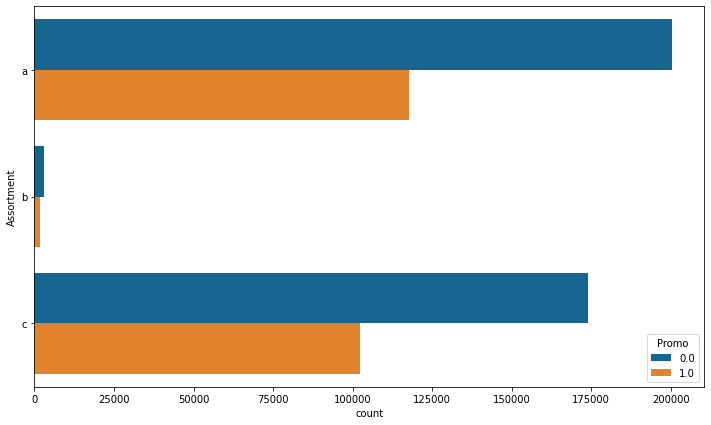

In [34]:
plt.figure(figsize=(12, 7))
sns.countplot(y='Assortment',
              hue='Promo',
              data=merged_train_store.sort_values(by = ['Assortment']));

#### c) Number of Promo broken down by Promo2  

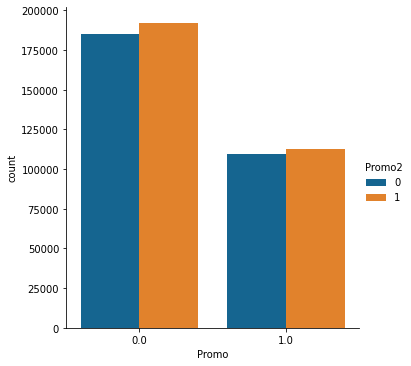

In [32]:
sns.catplot(x='Promo', 
            hue='Promo2',
            kind="count",
            data=merged_train_store);

## 4. Distributin of Sales with Promo and Promo2

In [48]:
nonzero_merged_Sales = merged_train_store.loc[~merged_train_store.loc[:, 'Sales'].isnull()]

nonzero_merged_Sales = nonzero_merged_Sales.loc[nonzero_merged_Sales.Sales > 0]

### a) Distribution of Sales with and without Promo

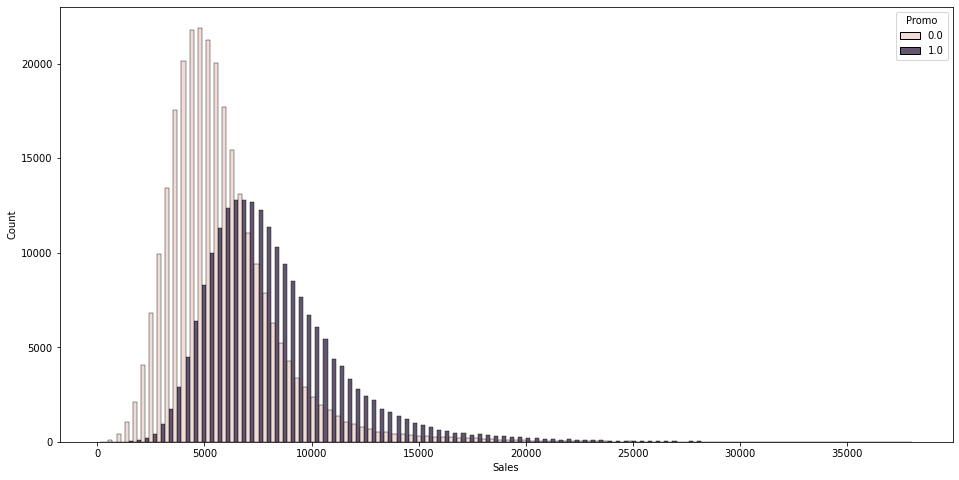

In [57]:
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales',  
            hue='Promo',
            multiple='dodge',
            bins= 100,
            data=nonzero_merged_Sales);

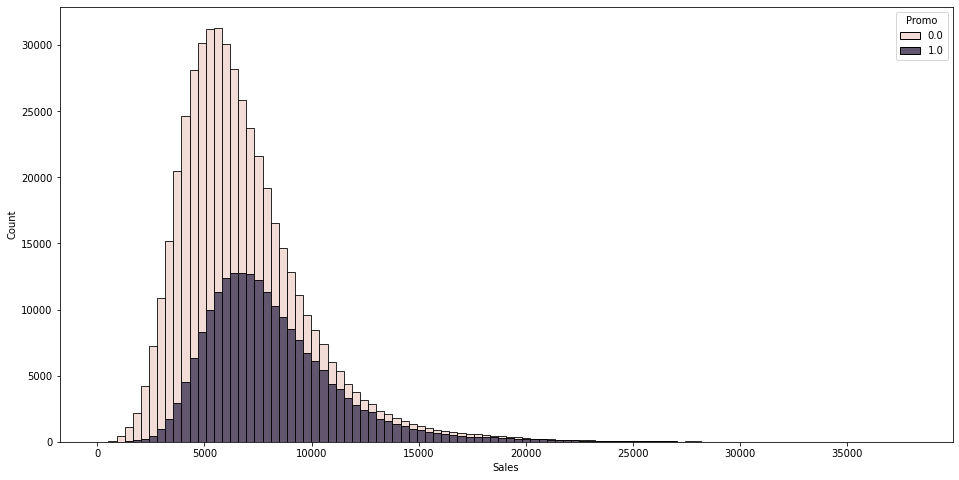

In [61]:
# Stacked bars
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales',  
            hue='Promo',
            multiple='stack',
            bins= 100,
            data=nonzero_merged_Sales);

In [62]:
### b) Distribution of Sales with and without Promo2

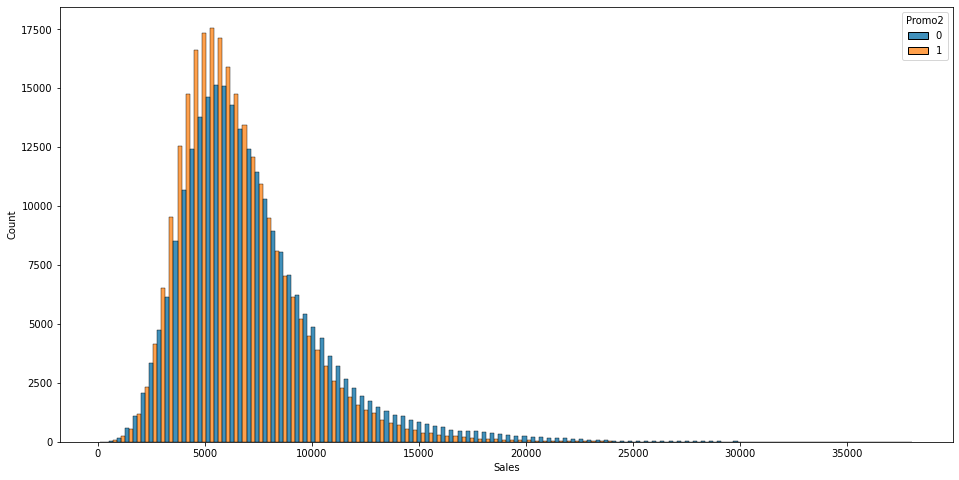

In [56]:
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales', 
            hue='Promo2',
            multiple='dodge',
            bins= 100,
            data=nonzero_merged_Sales);

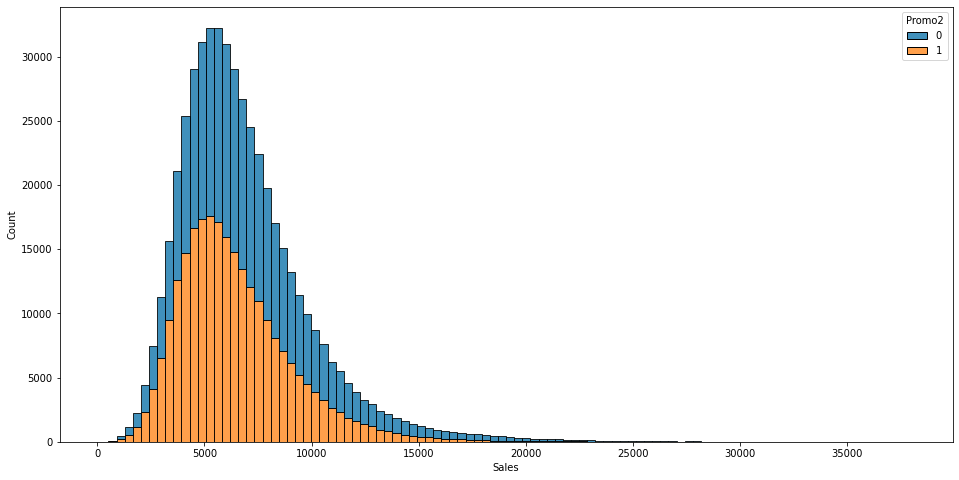

In [59]:
# Stacked bars
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales', 
            hue='Promo2',
            multiple='stack',
            bins= 100,
            data=nonzero_merged_Sales);